In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#!pip install geopandas

In [4]:
import geopandas as gpd

In [5]:
url1 = 'https://www.opendata.nhs.scot/dataset/0d57311a-db66-4eaa-bd6d-cc622b6cbdfa/resource/a5f7ca94-c810-41b5-a7c9-25c18d43e5a4/download/weekly_ae_activity_20240526.csv'
df_week_AE = pd.read_csv(url1)
df_week_AE.head()
#df_week_AE : This data resource contains weekly key statistics on new and unplanned return attendances at Emergency Department (ED) services across Scotland.

,WeekEndingDate,Country,HBT,TreatmentLocation,DepartmentType,NumberOfAttendancesEpisode,NumberWithin4HoursEpisode,NumberOver4HoursEpisode,PercentageWithin4HoursEpisode,NumberOver8HoursEpisode,PercentageOver8HoursEpisode,NumberOver12HoursEpisode,PercentageOver12HoursEpisode
0,20150222,S92000003,S08000015,A210H,Emergency Department,814,624,190,76.7,21,2.6,2,0.2
1,20150222,S92000003,S08000015,A111H,Emergency Department,1347,1115,232,82.8,31,2.3,2,0.1
2,20150222,S92000003,S08000016,B120H,Emergency Department,517,463,54,89.6,1,0.2,0,0.0
3,20150222,S92000003,S08000017,Y146H,Emergency Department,604,578,26,95.7,0,0.0,0,0.0
4,20150222,S92000003,S08000017,Y144H,Emergency Department,196,185,11,94.4,1,0.5,0,0.0


In [6]:
url2 = 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/022c3b27-6a58-48dc-8038-8f1f93bb0e78/download/opendata_monthly_ae_when_202404.csv'
df_month_AE = pd.read_csv(url2)
df_month_AE.head()
#df_month_AE : This data resource contains monthly statistics on new and unplanned return attendances at Accident and Emergency (A&E) services across Scotland by day of week, arrival hour, weekday/weekend and in hours/out of hours.

,Month,Country,HBT,TreatmentLocation,DepartmentType,Day,Week,Hour,InOut,NumberOfAttendances
0,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,00:00 to 00:59,Out of Hours,20
1,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,01:00 to 01:59,Out of Hours,14
2,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,02:00 to 02:59,Out of Hours,6
3,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,03:00 to 03:59,Out of Hours,5
4,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,04:00 to 04:59,Out of Hours,5


In [34]:
group_week= df_month_AE.groupby(['HBT','Week','Day']).agg({'NumberOfAttendances': 'sum'}).reset_index()
group_week= group_week.merge(HBnames, left_on= 'HBT', right_on='HBCode')
group_week

,HBT,Week,Day,NumberOfAttendances,HBCode,HBName
0,S08000015,Weekday,Friday,83236,S08000015,Ayrshire and Arran
1,S08000015,Weekday,Monday,97001,S08000015,Ayrshire and Arran
2,S08000015,Weekday,Thursday,84406,S08000015,Ayrshire and Arran
3,S08000015,Weekday,Tuesday,88316,S08000015,Ayrshire and Arran
4,S08000015,Weekday,Wednesday,85399,S08000015,Ayrshire and Arran
...,...,...,...,...,...,...
93,S08000032,Weekday,Thursday,181970,S08000032,Lanarkshire
94,S08000032,Weekday,Tuesday,191457,S08000032,Lanarkshire
95,S08000032,Weekday,Wednesday,184792,S08000032,Lanarkshire
96,S08000032,Weekend,Saturday,149059,S08000032,Lanarkshire


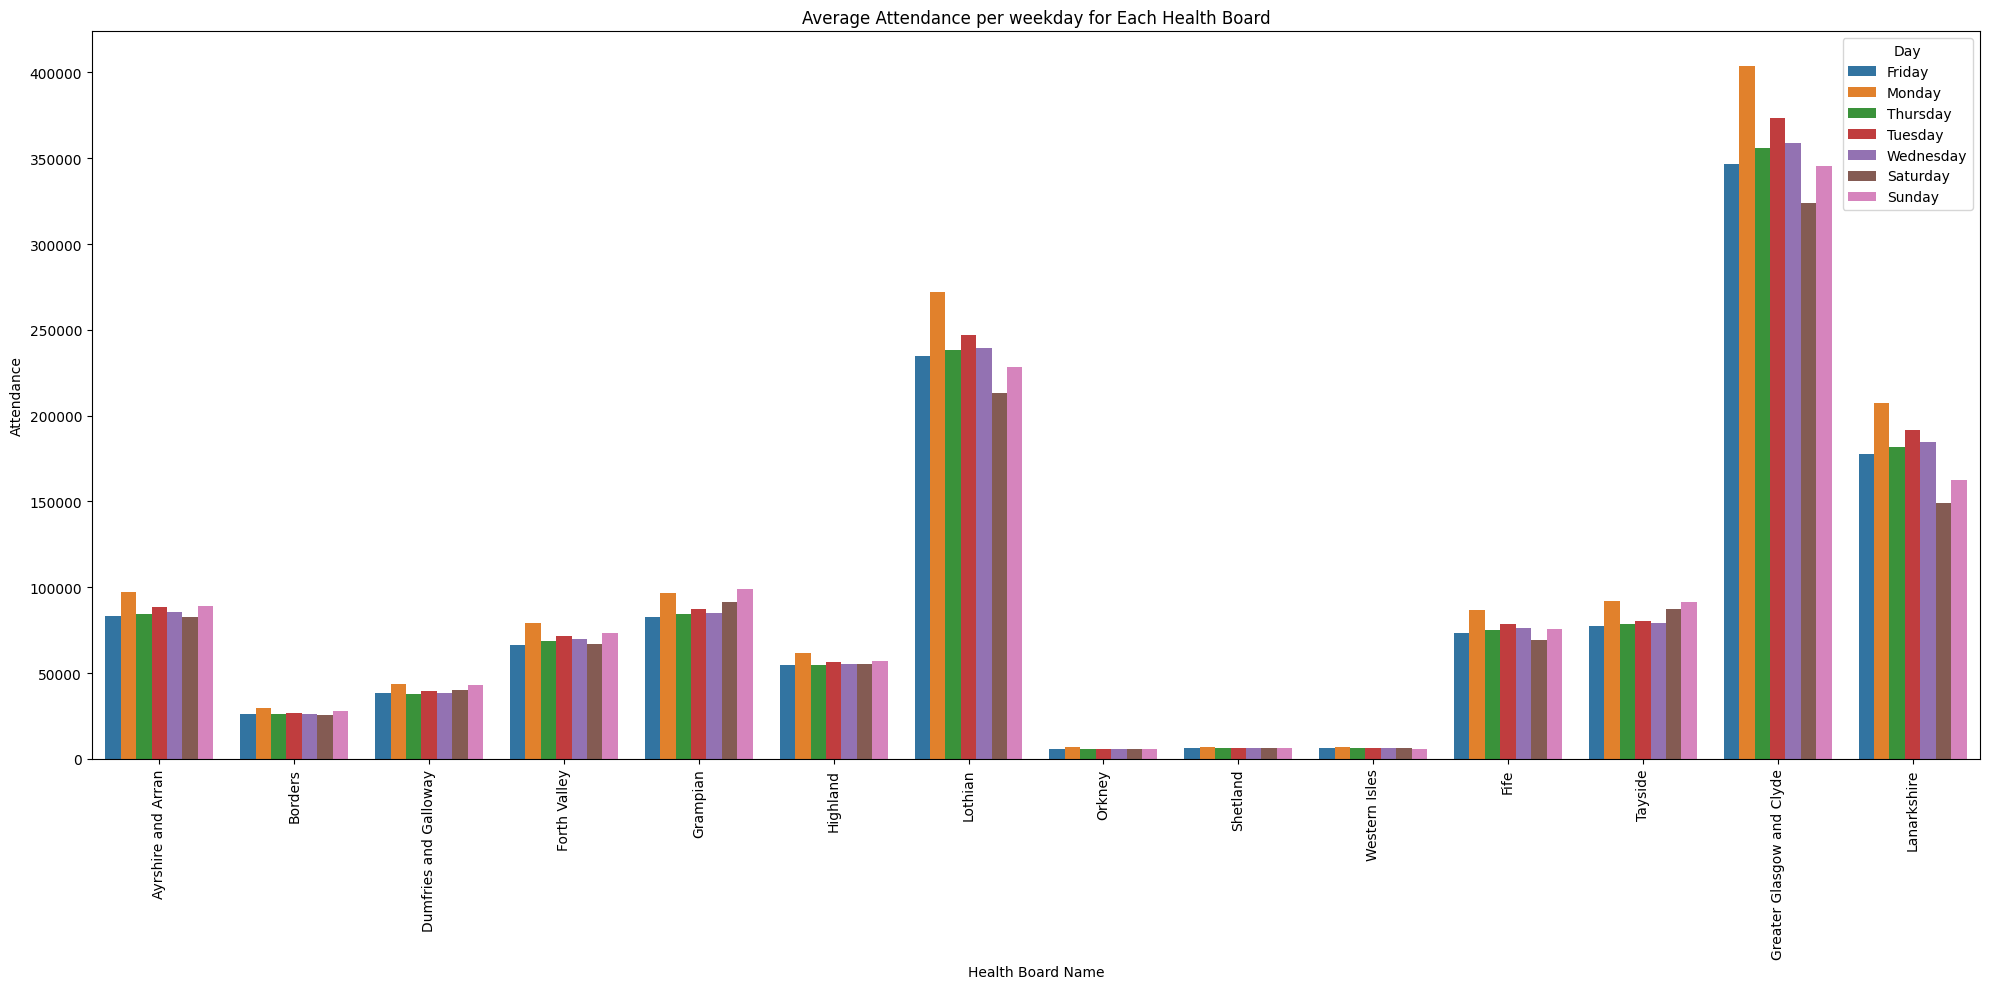

In [36]:
plt.figure(figsize=(20, 10))
sns.barplot(group_week, x= 'HBName', y='NumberOfAttendances', hue='Day')
plt.xlabel('Health Board Name')
plt.ylabel('Attendance')
plt.title('Average Attendance per weekday for Each Health Board')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()

plt.show()

In [11]:
# Group by 'HBT' and 'InOut' and sum 'NumberOfAttendances'
grouped_df = df_month_AE.groupby(['HBT', 'InOut']).agg({'NumberOfAttendances': 'sum'}).reset_index()

# Display the grouped DataFrame
grouped_df

# Pivot the DataFrame to have 'InOut' values as columns
pivot_df = grouped_df.pivot(index='HBT', columns='InOut', values='NumberOfAttendances').reset_index()

# Rename columns for better clarity
pivot_df.columns.name = None  # Remove the name of the columns index
pivot_df = pivot_df.rename(columns={
    'Out of Hours': 'OutOfHours',
    'In Hours': 'InHours'
})

#pivot_df
grouped_df

,HBT,InOut,NumberOfAttendances
0,S08000015,In Hours,265109
1,S08000015,Out of Hours,344849
2,S08000016,In Hours,85656
3,S08000016,Out of Hours,102743
4,S08000017,In Hours,122415
5,S08000017,Out of Hours,158427
6,S08000019,In Hours,221172
7,S08000019,Out of Hours,274065
8,S08000020,In Hours,247925
9,S08000020,Out of Hours,378356


In [12]:
url3 = 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/c4622324-f59c-4011-a67b-83b59c59ca94/download/opendata_monthly_ae_discharge_202404.csv'
df_discharge = pd.read_csv(url3)
df_discharge.head()
#df_discharge : This data resource contains monthly statistics on new and unplanned return attendances at Accident and Emergency (A&E) services across Scotland by discharge destination and age group.

,Month,Country,HBT,TreatmentLocation,DepartmentType,Age,AgeQF,Discharge,DischargeQF,NumberOfAttendances
0,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Admission to same Hospital,NaN,85
1,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Discharged Home or to usual Place of Residence,NaN,386
2,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,Transferred to Other Hospital/Service,NaN,5
3,201801,S92000003,S08000015,A111H,Emergency Department,18-24,NaN,NaN,:,18
4,201801,S92000003,S08000015,A111H,Emergency Department,25-39,NaN,Admission to same Hospital,NaN,206


In [13]:
# Replace NaN values in the 'Discharge' column with 'Unknown' for clarity
df_discharge['Discharge'].fillna('Unknown', inplace=True)

# Group by Health Board (HBT) and Discharge, then sum the attendances
grouped = df_discharge.groupby(['HBT', 'Discharge'])['NumberOfAttendances'].sum().reset_index()

grouped


/tmp/ipykernel_1592/4001232292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_discharge['Discharge'].fillna('Unknown', inplace=True)


,HBT,Discharge,NumberOfAttendances
0,S08000015,Admission to same Hospital,178781
1,S08000015,Discharged Home or to usual Place of Residence,392596
2,S08000015,Other,1001
3,S08000015,Transferred to Other Hospital/Service,9117
4,S08000015,Unknown,28463
...,...,...,...
65,S08000032,Admission to same Hospital,391281
66,S08000032,Discharged Home or to usual Place of Residence,835414
67,S08000032,Other,1538
68,S08000032,Transferred to Other Hospital/Service,18513


In [14]:
url4 = 'https://www.opendata.nhs.scot/dataset/cbd1802e-0e04-4282-88eb-d7bdcfb120f0/resource/c698f450-eeed-41a0-88f7-c1e40a568acc/download/hospitals.csv'
df_hospital = pd.read_csv(url4)
df_hospital.head()
#df_hospital : A list of all NHS hospitals across Scotland and associated geographic information. It should be noted that this list contains all hospitals in Scotland, not only acute hospitals.

,HospitalCode,HospitalName,AddressLine1,AddressLine2,AddressLine2QF,AddressLine3,AddressLine3QF,AddressLine4,AddressLine4QF,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,DataZone
0,A101H,Arran War Memorial Hospital,Lamlash,Isle of Arran,NaN,NaN,z,NaN,z,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176
1,A103H,Ayrshire Central Hospital,Kilwinning Road,Irvine,NaN,NaN,z,NaN,z,KA128SS,S08000015,S37000020,S12000021,S02002105,S01011213
2,A105H,Kirklandside Hospital,Kirklandside,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA1 5LH,S08000015,S37000008,S12000008,S02001492,S01007961
3,A110H,Lady Margaret Hospital,College St,Millport,NaN,Isle of Cumbrae,NaN,NaN,z,KA280HF,S08000015,S37000020,S12000021,S02002128,S01011328
4,A111H,University Hospital Crosshouse,Kilmarnock Road,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA2 0BE,S08000015,S37000008,S12000008,S02001504,S01008027


In [15]:
# Group by 'HBCode' and count the number of occurrences
hospital_counts = df_hospital.groupby('HealthBoard').size().reset_index(name='NumberOfHospitals')
hospital_counts

,HealthBoard,NumberOfHospitals
0,S08000015,17
1,S08000016,15
2,S08000017,21
3,S08000019,8
4,S08000020,35
5,S08000022,32
6,S08000024,33
7,S08000025,1
8,S08000026,1
9,S08000028,3


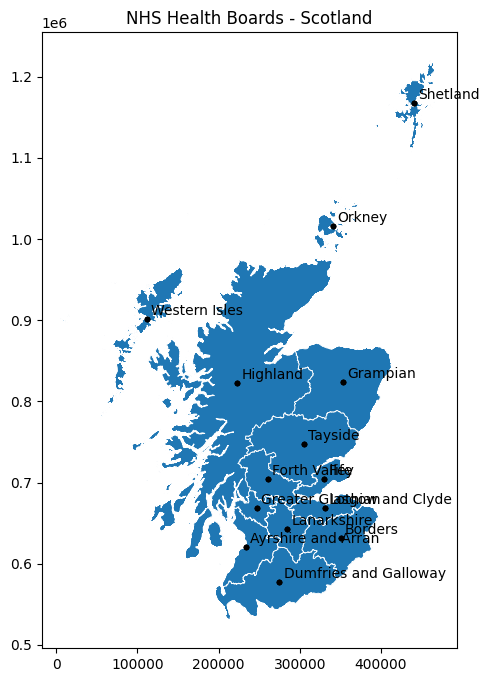

In [16]:
shapefile_path = "SG_NHS_HealthBoards_2019"

#Reading the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

#Plotting the map
#gdf.plot()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(linewidth=0.6, ax=ax, legend=True, edgecolor='white', legend_kwds={'label': "Patients"})

plt.title("NHS Health Boards - Scotland")

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['HBName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10)
    # Draw lines
    ax.plot([x, x], [y, y], color='black', marker='o', markersize=3)
    ax.plot([x, x + 0.02], [y, y + 0.02], color='black', marker='o', markersize=3)

#ax.set_title('Total Patients for each board')

plt.show()

In [32]:
gdf
HBnames= gdf[['HBCode','HBName']]
HBnames
gdf.head()

,HBCode,HBName,Shape_Leng,Shape_Area,geometry
0,S08000015,Ayrshire and Arran,679782.304484,3.408802e+09,"MULTIPOLYGON (((201916.200 600444.404, 201918...."
1,S08000016,Borders,525406.707597,4.742685e+09,"POLYGON ((345325.903 579663.303, 345325.104 57..."
2,S08000017,Dumfries and Galloway,830301.195667,6.676315e+09,"MULTIPOLYGON (((266004.400 543544.601, 266010...."
3,S08000019,Forth Valley,430568.335921,2.733659e+09,"POLYGON ((256533.002 740502.003, 256501.497 74..."
4,S08000020,Grampian,802844.271310,8.800885e+09,"MULTIPOLYGON (((383521.198 771234.696, 383524...."


In [18]:
df_month= df_month_AE[['HBT', 'NumberOfAttendances']]
df_month.head()

# Group by 'HBCode' and sum 'NumberOfAttendances'
df_month_agg = df_month.groupby('HBT', as_index=False).agg({'NumberOfAttendances': 'sum'})
df_month_agg= df_month_agg.merge(hospital_counts,right_on='HealthBoard', left_on='HBT')
df_month_agg= df_month_agg[['HBT','NumberOfAttendances','NumberOfHospitals']]
df_month_agg= df_month_agg.merge(pivot_df, left_on='HBT',right_on='HBT')

gdf_month_AE = gdf.merge(df_month_agg, left_on='HBCode', right_on='HBT')
gdf_month_AE= gdf_month_AE[['HBCode','HBName','Shape_Leng','Shape_Area','geometry','NumberOfAttendances','NumberOfHospitals','InHours',	'OutOfHours']]

gdf_month_AE

,HBCode,HBName,Shape_Leng,Shape_Area,geometry,NumberOfAttendances,NumberOfHospitals,InHours,OutOfHours
0,S08000015,Ayrshire and Arran,6.797823e+05,3.408802e+09,"MULTIPOLYGON (((201916.200 600444.404, 201918....",609958,17,265109,344849
1,S08000016,Borders,5.254067e+05,4.742685e+09,"POLYGON ((345325.903 579663.303, 345325.104 57...",188399,15,85656,102743
2,S08000017,Dumfries and Galloway,8.303012e+05,6.676315e+09,"MULTIPOLYGON (((266004.400 543544.601, 266010....",280842,21,122415,158427
3,S08000019,Forth Valley,4.305683e+05,2.733659e+09,"POLYGON ((256533.002 740502.003, 256501.497 74...",495237,8,221172,274065
4,S08000020,Grampian,8.028443e+05,8.800885e+09,"MULTIPOLYGON (((383521.198 771234.696, 383524....",626281,35,247925,378356
5,S08000022,Highland,8.486538e+06,3.363704e+10,"MULTIPOLYGON (((173254.001 604986.004, 173258....",395366,32,178841,216525
6,S08000024,Lothian,3.789231e+05,1.760804e+09,"MULTIPOLYGON (((313586.104 679560.597, 313614....",1672455,33,757927,914528
7,S08000025,Orkney,1.589228e+06,1.086211e+09,"MULTIPOLYGON (((347378.503 976721.996, 347387....",40748,1,20245,20503
8,S08000026,Shetland,2.211514e+06,1.656618e+09,"MULTIPOLYGON (((419927.604 1069152.398, 419927...",45730,1,21673,24057
9,S08000028,Western Isles,3.723205e+06,3.268473e+09,"MULTIPOLYGON (((55528.504 780719.001, 55556.50...",44175,3,21093,23082


In [19]:
df_month_agg

,HBT,NumberOfAttendances,NumberOfHospitals,InHours,OutOfHours
0,S08000015,609958,17,265109,344849
1,S08000016,188399,15,85656,102743
2,S08000017,280842,21,122415,158427
3,S08000019,495237,8,221172,274065
4,S08000020,626281,35,247925,378356
5,S08000022,395366,32,178841,216525
6,S08000024,1672455,33,757927,914528
7,S08000025,40748,1,20245,20503
8,S08000026,45730,1,21673,24057
9,S08000028,44175,3,21093,23082


In [20]:
df_month_agg1= gdf_month_AE[['HBName','HBCode','NumberOfAttendances', 'NumberOfHospitals', 'InHours','OutOfHours']]
df_month_agg1

,HBName,HBCode,NumberOfAttendances,NumberOfHospitals,InHours,OutOfHours
0,Ayrshire and Arran,S08000015,609958,17,265109,344849
1,Borders,S08000016,188399,15,85656,102743
2,Dumfries and Galloway,S08000017,280842,21,122415,158427
3,Forth Valley,S08000019,495237,8,221172,274065
4,Grampian,S08000020,626281,35,247925,378356
5,Highland,S08000022,395366,32,178841,216525
6,Lothian,S08000024,1672455,33,757927,914528
7,Orkney,S08000025,40748,1,20245,20503
8,Shetland,S08000026,45730,1,21673,24057
9,Western Isles,S08000028,44175,3,21093,23082


In [21]:
df_month_agg1['Attendance per hospital']= round(df_month_agg1['NumberOfAttendances']/df_month_agg1['NumberOfHospitals'],3)
df_month_agg1

/tmp/ipykernel_1592/3972975516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_agg1['Attendance per hospital']= round(df_month_agg1['NumberOfAttendances']/df_month_agg1['NumberOfHospitals'],3)


,HBName,HBCode,NumberOfAttendances,NumberOfHospitals,InHours,OutOfHours,Attendance per hospital
0,Ayrshire and Arran,S08000015,609958,17,265109,344849,35879.882
1,Borders,S08000016,188399,15,85656,102743,12559.933
2,Dumfries and Galloway,S08000017,280842,21,122415,158427,13373.429
3,Forth Valley,S08000019,495237,8,221172,274065,61904.625
4,Grampian,S08000020,626281,35,247925,378356,17893.743
5,Highland,S08000022,395366,32,178841,216525,12355.188
6,Lothian,S08000024,1672455,33,757927,914528,50680.455
7,Orkney,S08000025,40748,1,20245,20503,40748.000
8,Shetland,S08000026,45730,1,21673,24057,45730.000
9,Western Isles,S08000028,44175,3,21093,23082,14725.000


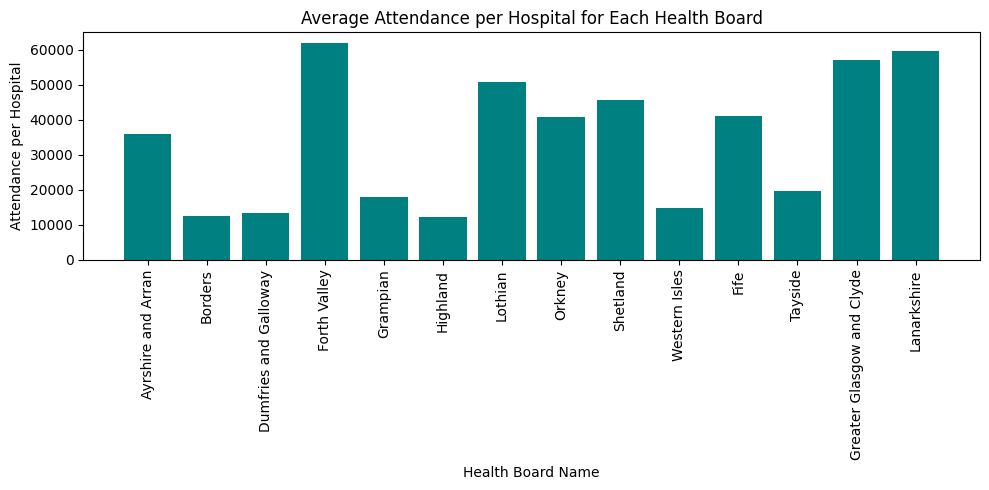

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(df_month_agg1['HBName'], df_month_agg1['Attendance per hospital'], color='teal')
plt.xlabel('Health Board Name')
plt.ylabel('Attendance per Hospital')
plt.title('Average Attendance per Hospital for Each Health Board')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()

plt.show()


In [23]:
grouped_df= grouped_df.merge(HBnames,right_on='HBCode', left_on='HBT')

grouped_df


,HBT,InOut,NumberOfAttendances,HBCode,HBName
0,S08000015,In Hours,265109,S08000015,Ayrshire and Arran
1,S08000015,Out of Hours,344849,S08000015,Ayrshire and Arran
2,S08000016,In Hours,85656,S08000016,Borders
3,S08000016,Out of Hours,102743,S08000016,Borders
4,S08000017,In Hours,122415,S08000017,Dumfries and Galloway
5,S08000017,Out of Hours,158427,S08000017,Dumfries and Galloway
6,S08000019,In Hours,221172,S08000019,Forth Valley
7,S08000019,Out of Hours,274065,S08000019,Forth Valley
8,S08000020,In Hours,247925,S08000020,Grampian
9,S08000020,Out of Hours,378356,S08000020,Grampian


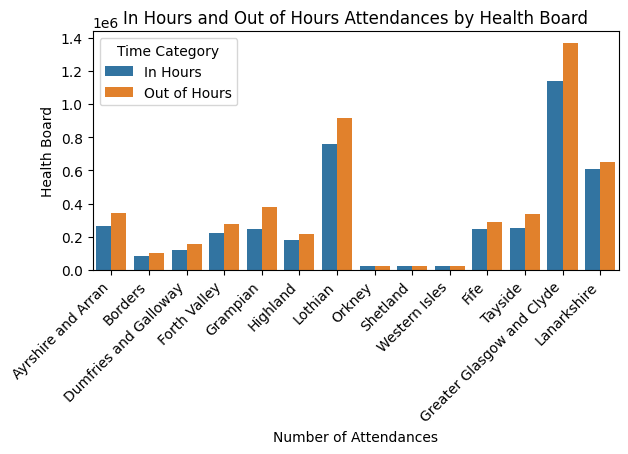

In [24]:
sns.barplot(data= grouped_df, x= 'HBName',y='NumberOfAttendances', hue= 'InOut')

# Customize the plot
plt.xlabel('Number of Attendances')
plt.ylabel('Health Board')
plt.title('In Hours and Out of Hours Attendances by Health Board')
plt.legend(title='Time Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right

# Show the plot
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [25]:
grouped= grouped.merge(HBnames, left_on='HBT', right_on='HBCode')
grouped

,HBT,Discharge,NumberOfAttendances,HBCode,HBName
0,S08000015,Admission to same Hospital,178781,S08000015,Ayrshire and Arran
1,S08000015,Discharged Home or to usual Place of Residence,392596,S08000015,Ayrshire and Arran
2,S08000015,Other,1001,S08000015,Ayrshire and Arran
3,S08000015,Transferred to Other Hospital/Service,9117,S08000015,Ayrshire and Arran
4,S08000015,Unknown,28463,S08000015,Ayrshire and Arran
...,...,...,...,...,...
65,S08000032,Admission to same Hospital,391281,S08000032,Lanarkshire
66,S08000032,Discharged Home or to usual Place of Residence,835414,S08000032,Lanarkshire
67,S08000032,Other,1538,S08000032,Lanarkshire
68,S08000032,Transferred to Other Hospital/Service,18513,S08000032,Lanarkshire


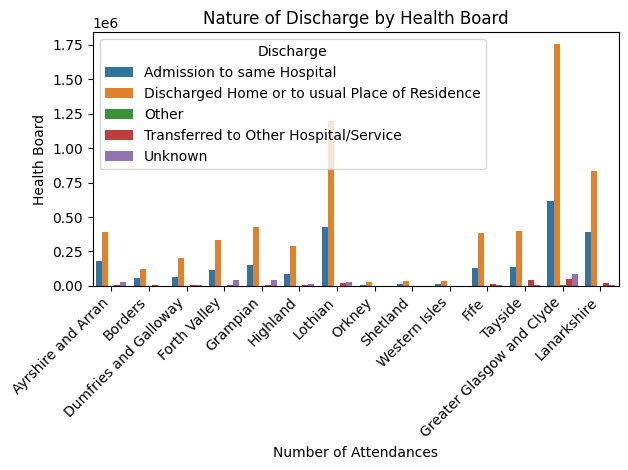

In [26]:
#grouped.head()

sns.barplot(data= grouped, x= 'HBName',y='NumberOfAttendances', hue= 'Discharge')

# Customize the plot
plt.xlabel('Number of Attendances')
plt.ylabel('Health Board')
plt.title('Nature of Discharge by Health Board')
plt.legend(title='Discharge')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the labels to the right

# Show the plot
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()


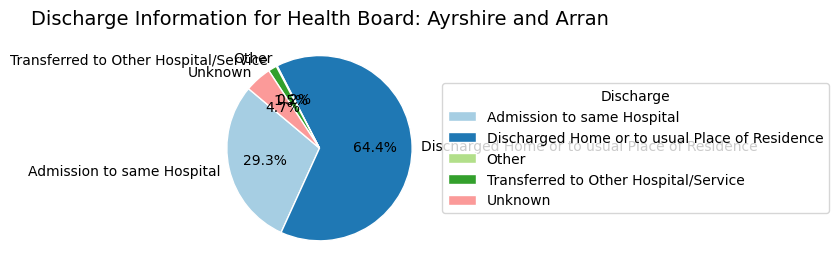

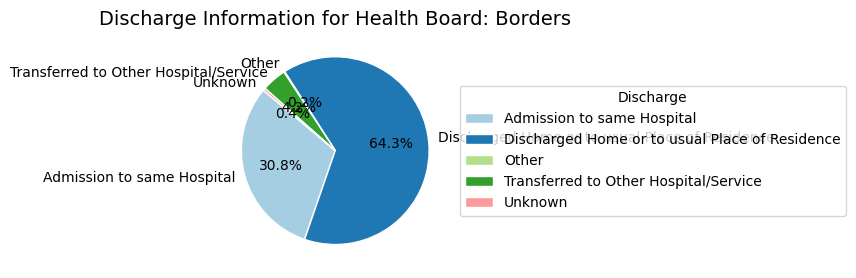

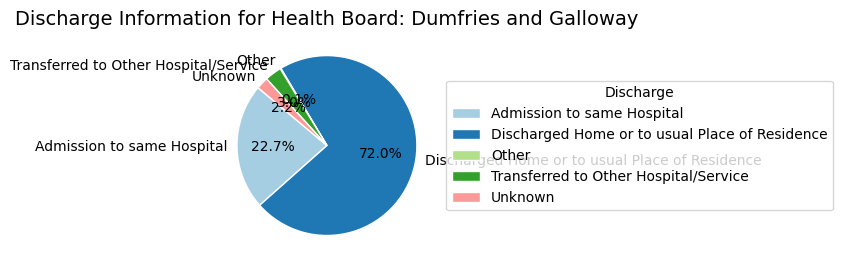

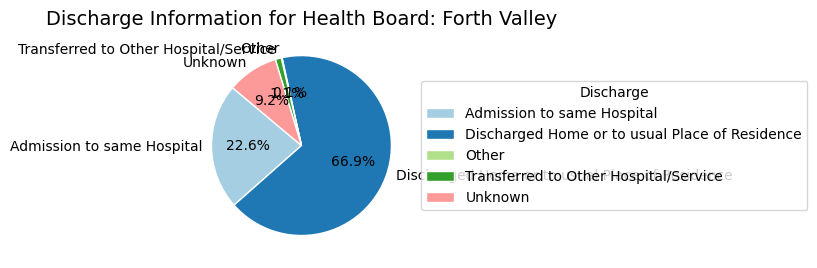

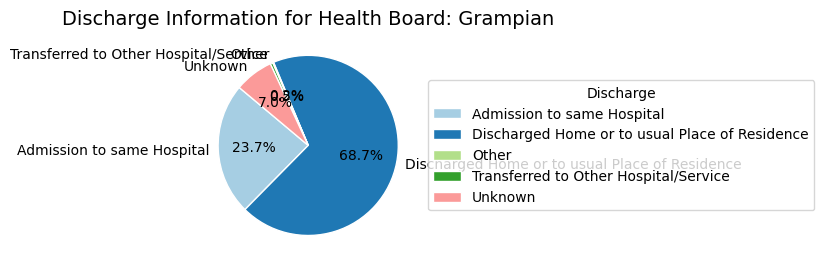

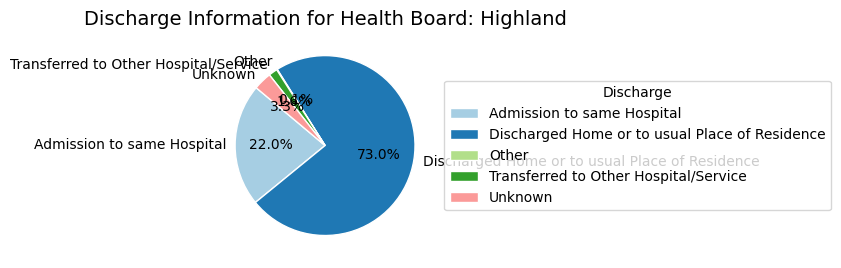

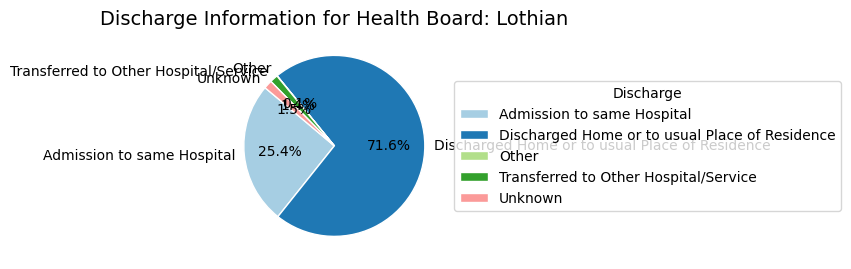

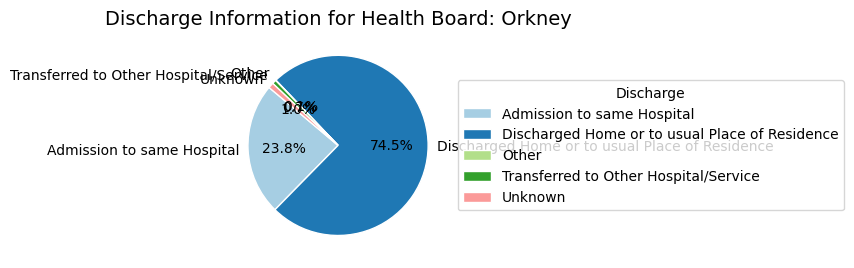

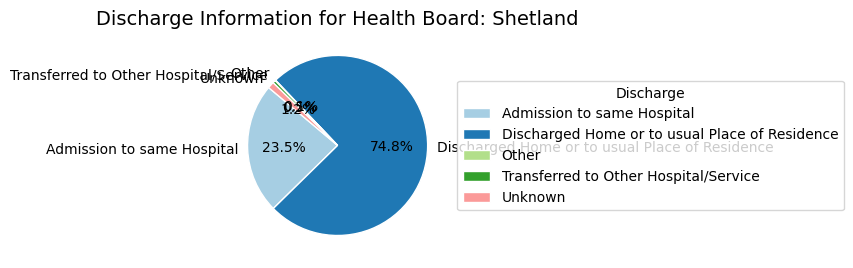

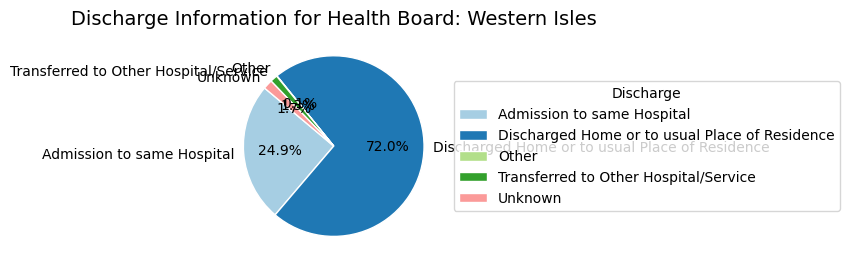

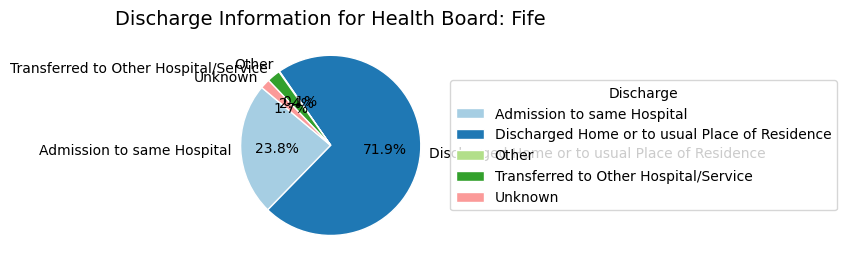

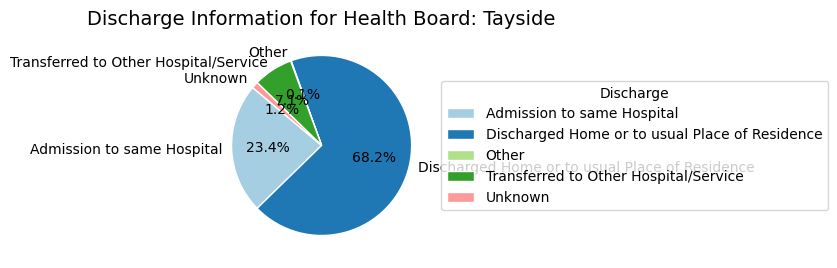

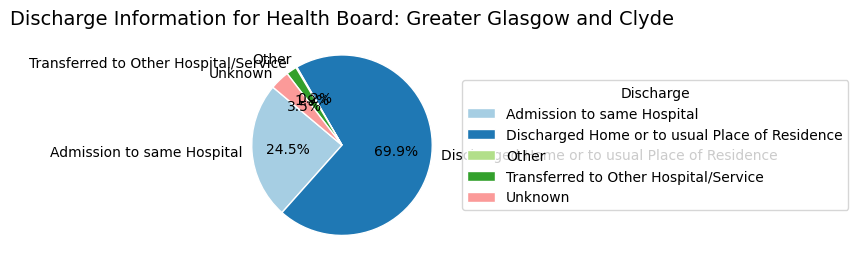

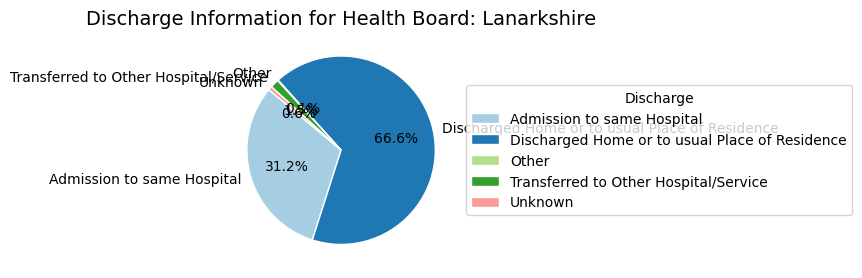

In [30]:
health_boards = grouped['HBT'].unique()

for hb in health_boards:
    hb_data = grouped[grouped['HBT'] == hb]
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        hb_data['NumberOfAttendances'], 
        labels=hb_data['Discharge'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    
    # Adjust text properties
    for text in texts + autotexts:
        text.set_fontsize(10)
    
    plt.title(f'Discharge Information for Health Board: {hb_data["HBName"].values[0]}', fontsize=14)
    plt.legend(wedges, hb_data['Discharge'], title="Discharge", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.tight_layout()
    plt.show()


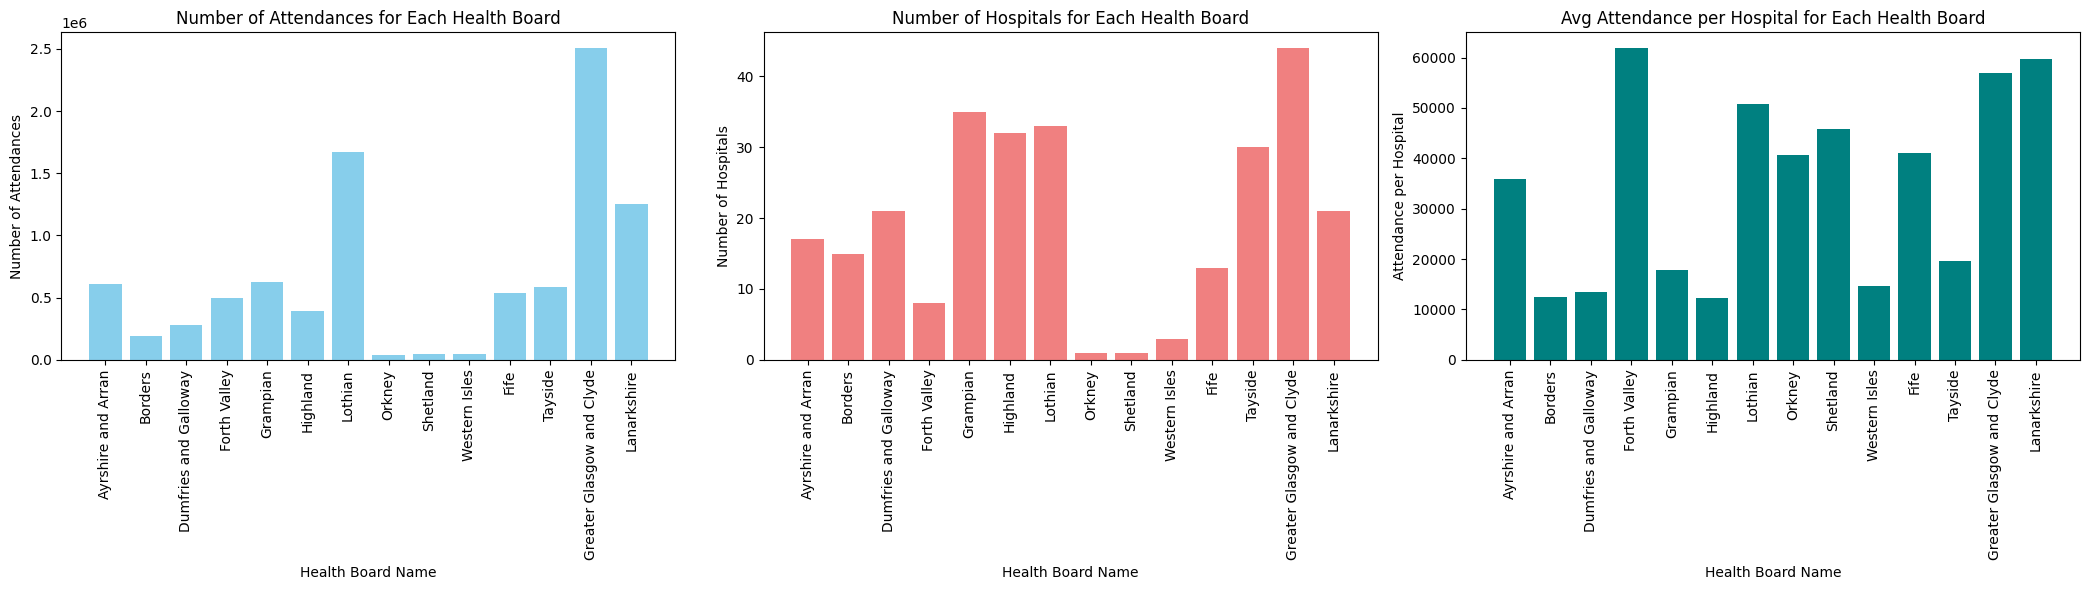

In [ ]:

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

# First plot: Number of Attendances
axes[0].bar(df_month_agg1['HBName'], df_month_agg1['NumberOfAttendances'], color='skyblue')
axes[0].set_xlabel('Health Board Name')
axes[0].set_ylabel('Number of Attendances')
axes[0].set_title('Number of Attendances for Each Health Board')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Second plot: Number of Hospitals
axes[1].bar(df_month_agg1['HBName'], df_month_agg1['NumberOfHospitals'], color='lightcoral')
axes[1].set_xlabel('Health Board Name')
axes[1].set_ylabel('Number of Hospitals')
axes[1].set_title('Number of Hospitals for Each Health Board')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

axes[2].bar(df_month_agg1['HBName'], df_month_agg1['Attendance per hospital'], color='teal')
axes[2].set_xlabel('Health Board Name')
axes[2].set_ylabel('Attendance per Hospital')
axes[2].set_title('Avg Attendance per Hospital for Each Health Board')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# Plotting using Matplotlib
#plt.figure(figsize=(6, 3))
#plt.bar(df_month_agg1['HBName'], df_month_agg1['NumberOfAttendances'], color='skyblue')
#plt.xlabel('Health Board Name')
#plt.ylabel('Number of Attendances')
#plt.title('Number of Attendances for Each Health Board')
#plt.xticks(rotation=90)  # Rotate x labels for better readability.

#plt.figure(figsize=(6, 3))
#plt.bar(df_month_agg1['HBName'],df_month_agg1['NumberOfHospitals'], color='skyblue')
#plt.xlabel('Health Board Name')
#plt.ylabel('Number of Hospitals')
#plt.title('Number of Hospitals for Each Health Board')
#plt.xticks(rotation=90)  # Rotate x labels for better readability


#plt.show()

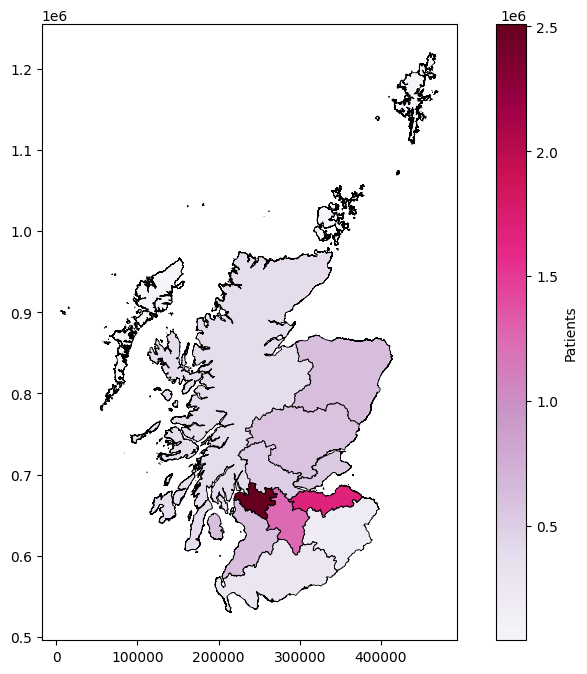

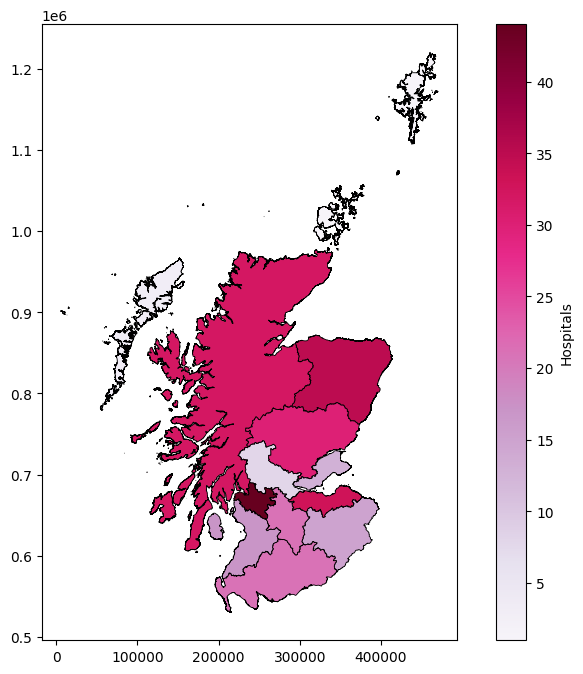

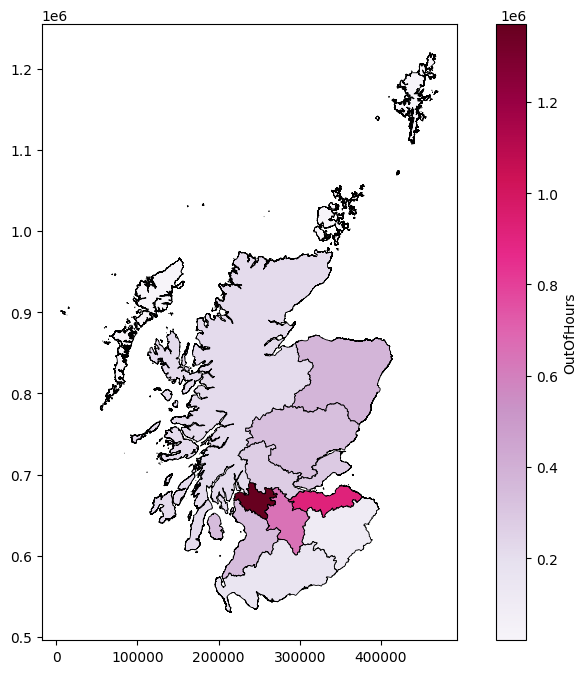

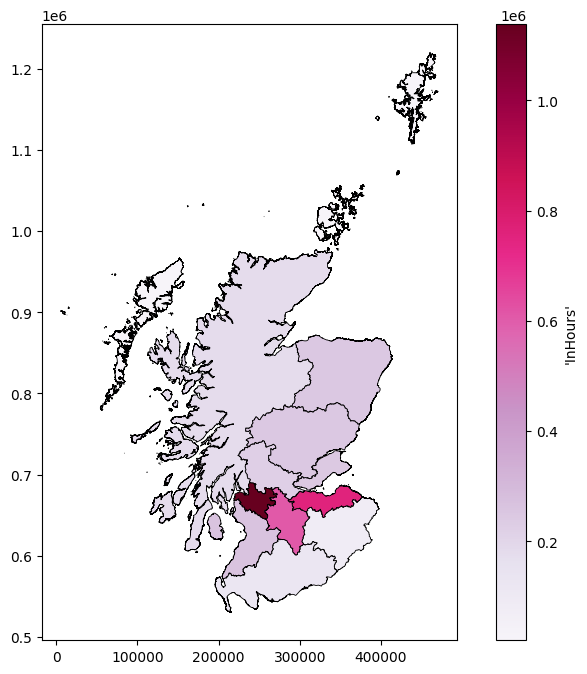

In [ ]:
# Plot the GeoDataFrame with a colormap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_month_AE.plot(column='NumberOfAttendances', cmap='PuRd', linewidth=0.6, ax=ax, legend=True, edgecolor='black', legend_kwds={'label': "Patients"})

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_month_AE.plot(column='NumberOfHospitals', cmap='PuRd', linewidth=0.6, ax=ax, legend=True, edgecolor='black', legend_kwds={'label': "Hospitals"})

#fig, ax = plt.subplots(1, 1, figsize=(10, 8))
#gdf_month_AE.plot(column='OutOfHours', cmap='PuRd', linewidth=0.6, ax=ax, legend=True, edgecolor='black', legend_kwds={'label': "OutOfHours"})

#fig, ax = plt.subplots(1, 1, figsize=(10, 8))
#gdf_month_AE.plot(column='InHours', cmap='PuRd', linewidth=0.6, ax=ax, legend=True, edgecolor='black', legend_kwds={'label': "'InHours'"})

plt.show()